In [76]:
import csv

In [77]:
filename = open('model_outcome.csv')
reader = csv.reader(filename)
outcome = [row for row in reader]
outcome1 = outcome[1:]

In [78]:
outcome_class = []
for a in outcome1:
    outcome_class.append(int(a[1]))

In [79]:
predicted_prob = []
for a in outcome1:
    predicted_prob.append(float(a[2]))

In [80]:
#We set threshold = 0.5
predicted_class = []
for a in predicted_prob:
    if a >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

In [81]:
true_positive = 0
condition_positive = 0
for i in range(len(outcome_class)):
    if outcome_class[i] == 1:
        condition_positive += 1
    if outcome_class[i] == 1 and predicted_class[i] == 1:
        true_positive += 1

In [82]:
Sensitivity = true_positive / condition_positive
Sensitivity

0.8170731707317073

In [83]:
true_negative = 0
condition_negative = 0
for i in range(len(outcome_class)):
    if outcome_class[i] == 0:
        condition_negative += 1
    if outcome_class[i] == 0 and predicted_class[i] == 0:
        true_negative += 1

In [84]:
specificity = true_negative / condition_negative
specificity

0.7578740157480315

In [85]:
AUC_denominator = condition_positive*condition_negative
AUC_denominator

249936

In [86]:
condition_positive_data = []
condition_negative_data = []
for i in range(len(predicted_prob)):
    if outcome_class[i] == 0:
        condition_negative_data.append(predicted_prob[i])
    else:
        condition_positive_data.append(predicted_prob[i])

In [87]:
count = 0
for a in condition_positive_data:
    for b in condition_negative_data:
        if a > b:
            count += 1
        elif a < b:
            count += 0
        else:
            count += 0.5
count

222113

In [88]:
AUC = count/AUC_denominator
AUC

0.8886795019524999

In [89]:
false_positive = 1 - specificity
false_positive

0.24212598425196852

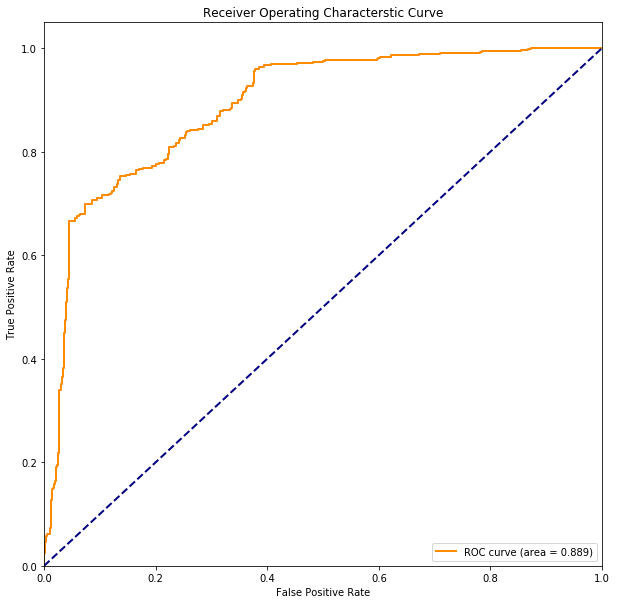

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(outcome_class, predicted_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc="lower right")
plt.show()